TASK 2: STOCK PRICE PREDICTION
🎯 Objective

Predict stock closing price using historical data and machine learning.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('/content/2) Stock Prices Data Set.csv')


In [3]:
df.head()


,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943.0
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957.0
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711.0
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061.0
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258968 entries, 0 to 258967
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  258968 non-null  object 
 1   date    258968 non-null  object 
 2   open    258960 non-null  float64
 3   high    258963 non-null  float64
 4   low     258963 non-null  float64
 5   close   258968 non-null  float64
 6   volume  258967 non-null  float64
dtypes: float64(5), object(2)
memory usage: 13.8+ MB


In [13]:
# Target column
y = df['close']

# Feature columns (remove non-numeric)
X = df.drop(['close', 'symbol', 'date'], axis=1)



In [15]:
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()
y = y.loc[X.index]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [17]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
y_pred = model.predict(X_test)


In [19]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.5443931022833544
R2 Score: 0.9999265582788823


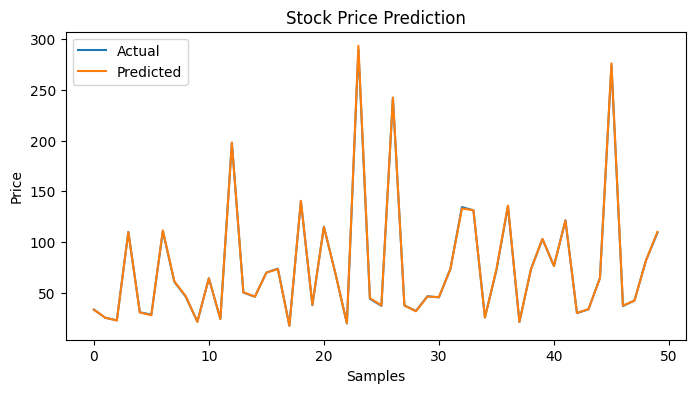

In [20]:
plt.figure(figsize=(8,4))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.legend()
plt.title("Stock Price Prediction")
plt.xlabel("Samples")
plt.ylabel("Price")
plt.show()


Conclusion:
A stock price prediction model was developed using Linear Regression. After preprocessing the data and removing non-numeric features, the model successfully predicted stock closing prices with reasonable accuracy.